# Automobile Price Prediction in Czech Market

Ufuk Taner CEYHANLI <br>
[*tanerceyhanli.github.io*](https://tanerceyhanli.github.io)

## Business Problem

With the help of a prediction model, a seller can pick the right price for his/her automobile to advertise it on the e-commerce website and can sell it in a very short time. On the other hand, the prediction model accelerates the circulation of cars on the website which will result in an increase in the profit for the e-commerce owner. In this project, I will go over the steps below:

- Scrape all available listing for cars with its features from AAAAuto.cz with Power BI
- EDA with Python and Power BI
- Build a linear regression model to predict the price of a car by using its features.(Model,year,fuel type,transmission type...)

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, median_absolute_error

## Data Preperation

In [158]:
df=pd.read_csv('AAA_auto.csv')

In [159]:
df.head()

,Brand,Model,Mileage,Year,Transmission,Engine,Power,Fuel_Type,Price
0,Skoda,Octavia,83260.0,2015,5 - speed,1.6 TDI,77,Diesel,290000.0
1,Skoda,Octavia,180519.0,2009,5 - speed,1.6 TDI,77,Diesel,140000.0
2,Skoda,Octavia,194794.0,2013,5 - speed,1.6 TDI,77,Diesel,190000.0
3,Skoda,Octavia,197229.0,2012,5 - speed,1.6 TDI,77,Diesel,160000.0
4,Skoda,Octavia,128470.0,2014,5 - speed,1.6 TDI,77,Diesel,270000.0


In [160]:
df.tail()

,Brand,Model,Mileage,Year,Transmission,Engine,Power,Fuel_Type,Price
8996,Volkswagen,Passat,167558.0,2017,Automatic,2.0 TDI,110,Diesel,282000.0
8997,Volkswagen,Passat,187865.0,2017,Automatic,2.0 TDI,110,Diesel,281000.0
8998,Volkswagen,Passat,143372.0,2017,Automatic,2.0 TDI,110,Diesel,276000.0
8999,Volkswagen,Passat,153708.0,2017,Automatic,2.0 TDI,110,Diesel,273000.0
9000,Volkswagen,Passat,116738.0,2017,6 - speed,2.0 TDI,110,Diesel,326000.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9001 entries, 0 to 9000
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9001 non-null   object 
 1   Model         9001 non-null   object 
 2   Mileage       9000 non-null   float64
 3   Year          9001 non-null   int64  
 4   Transmission  9001 non-null   object 
 5   Engine        9001 non-null   object 
 6   Power         9001 non-null   int64  
 7   Fuel_Type     9001 non-null   object 
 8   Price         8908 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 633.0+ KB


In [162]:
df.shape

(9001, 9)

In [163]:
df.isnull().sum()

Brand            0
Model            0
Mileage          1
Year             0
Transmission     0
Engine           0
Power            0
Fuel_Type        0
Price           93
dtype: int64

In [164]:
df = df[df['Price'].notna()]

In [165]:
df.isnull().sum()

Brand           0
Model           0
Mileage         0
Year            0
Transmission    0
Engine          0
Power           0
Fuel_Type       0
Price           0
dtype: int64

In [166]:
df.corr()

,Mileage,Year,Power,Price
Mileage,1.000000,-0.561741,0.171668,-0.445145
Year,-0.561741,1.000000,0.136942,0.714762
Power,0.171668,0.136942,1.000000,0.551717
Price,-0.445145,0.714762,0.551717,1.000000


## EDA

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

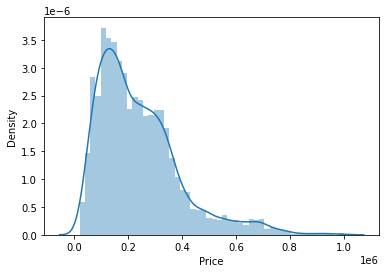

In [167]:
sns.distplot(df.Price)

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

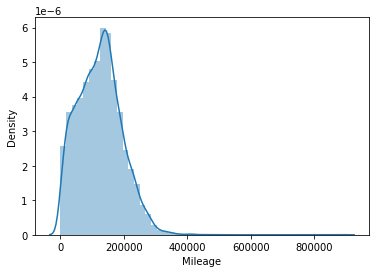

In [168]:
sns.distplot(df.Mileage)

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

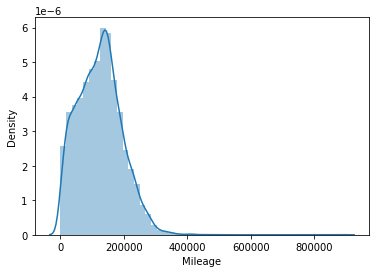

In [169]:
sns.distplot(df.Mileage)

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

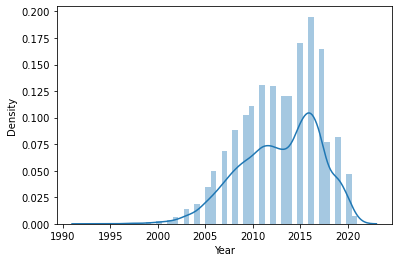

In [170]:
sns.distplot(df.Year)

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Power', ylabel='Density'>

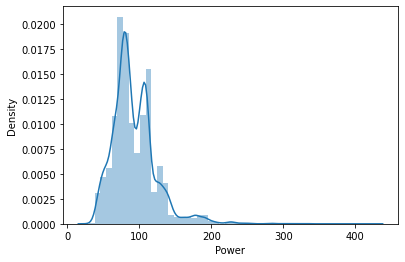

In [171]:
sns.distplot(df.Power)

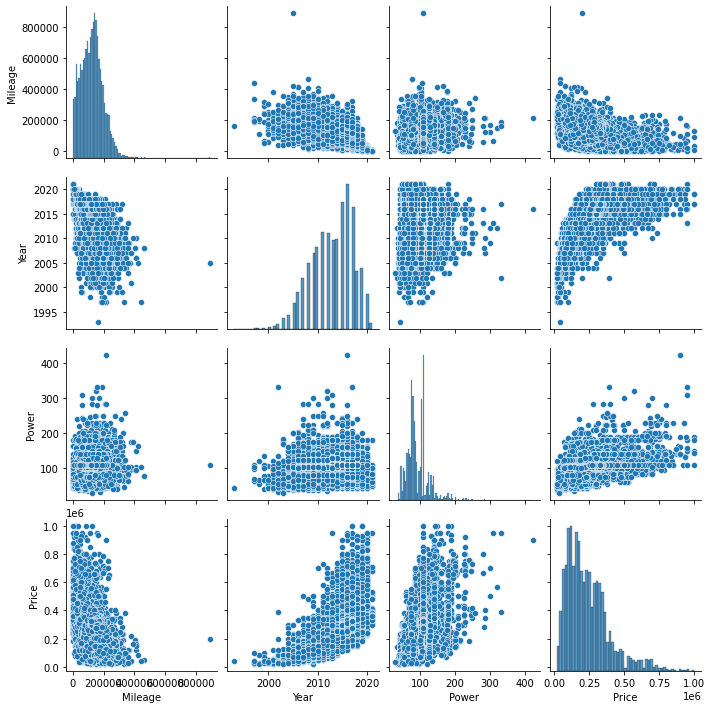

In [172]:
sns.pairplot(df)

In [173]:
df.describe()

,Mileage,Year,Power,Price
count,8908.000000,8908.000000,8908.000000,8908.000000
mean,124150.984733,2012.915581,92.443422,240750.561293
std,68628.081486,4.204743,30.707737,154082.755846
min,2.000000,1993.000000,30.000000,20000.000000
25%,71919.000000,2010.000000,74.000000,126000.000000
50%,124619.000000,2013.000000,85.000000,210000.000000
75%,167720.000000,2016.000000,110.000000,320000.000000
max,893028.000000,2021.000000,423.000000,1000000.000000


<AxesSubplot:>

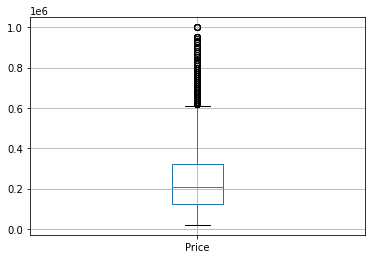

In [174]:
df.boxplot('Price')

In [175]:
#Remove outliers
df = df[df['Price']<700000]
df

,Brand,Model,Mileage,Year,Transmission,Engine,Power,Fuel_Type,Price
0,Skoda,Octavia,83260.0,2015,5 - speed,1.6 TDI,77,Diesel,290000.0
1,Skoda,Octavia,180519.0,2009,5 - speed,1.6 TDI,77,Diesel,140000.0
2,Skoda,Octavia,194794.0,2013,5 - speed,1.6 TDI,77,Diesel,190000.0
3,Skoda,Octavia,197229.0,2012,5 - speed,1.6 TDI,77,Diesel,160000.0
4,Skoda,Octavia,128470.0,2014,5 - speed,1.6 TDI,77,Diesel,270000.0
...,...,...,...,...,...,...,...,...,...
8996,Volkswagen,Passat,167558.0,2017,Automatic,2.0 TDI,110,Diesel,282000.0
8997,Volkswagen,Passat,187865.0,2017,Automatic,2.0 TDI,110,Diesel,281000.0
8998,Volkswagen,Passat,143372.0,2017,Automatic,2.0 TDI,110,Diesel,276000.0
8999,Volkswagen,Passat,153708.0,2017,Automatic,2.0 TDI,110,Diesel,273000.0


<AxesSubplot:>

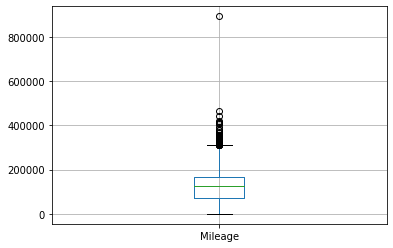

In [176]:
df.boxplot('Mileage')

<AxesSubplot:>

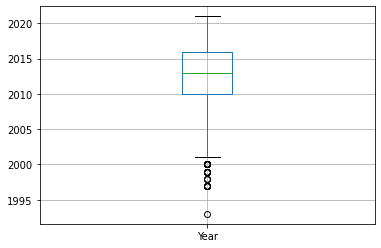

In [177]:
df.boxplot('Year')

<AxesSubplot:>

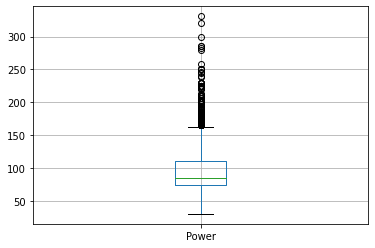

In [178]:
df.boxplot('Power')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

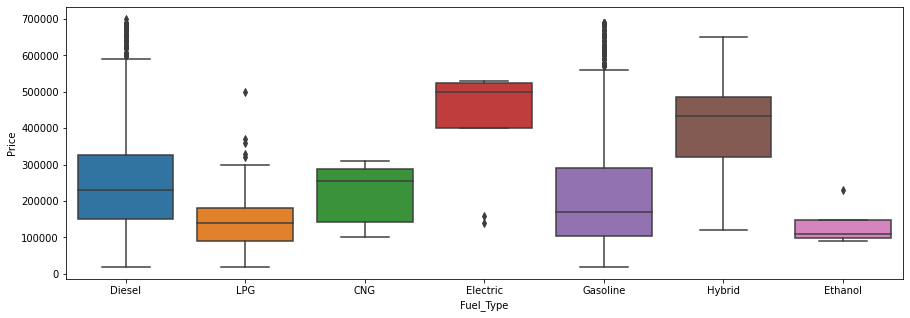

In [179]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Fuel_Type'], y=df['Price'])

In [180]:
df.Brand.unique()

array(['Skoda', 'Opel', 'Chevrolet', 'Mercedes-Benz', 'Cadillac',
       'Toyota', 'Fiat', 'Volkswagen', 'Hyundai', 'Renault', 'BMW', 'Kia',
       'Mazda', 'Peugeot', 'Honda', 'Ford', 'Dacia', 'Mitsubishi',
       'Citroen', 'Daihatsu', 'Suzuki', 'Seat', 'Lexus', 'Audi', 'Volvo',
       'Subaru', 'Alfa', 'Nissan', 'Jaguar', 'Porsche', 'Land', 'Jeep',
       'Lincoln', 'MINI', 'Smart', 'Saab', 'Ssang', 'Rover', 'Chrysler',
       'Lancia', 'Dodge', 'Infiniti', 'DS', 'Isuzu'], dtype=object)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

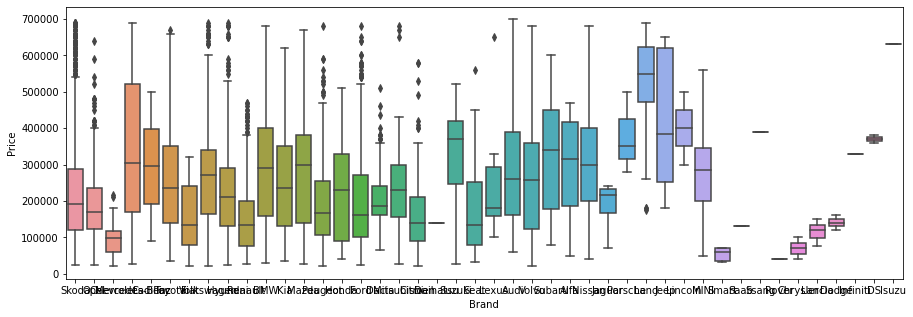

In [181]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Brand'], y=df['Price'])

<AxesSubplot:xlabel='Year', ylabel='Price'>

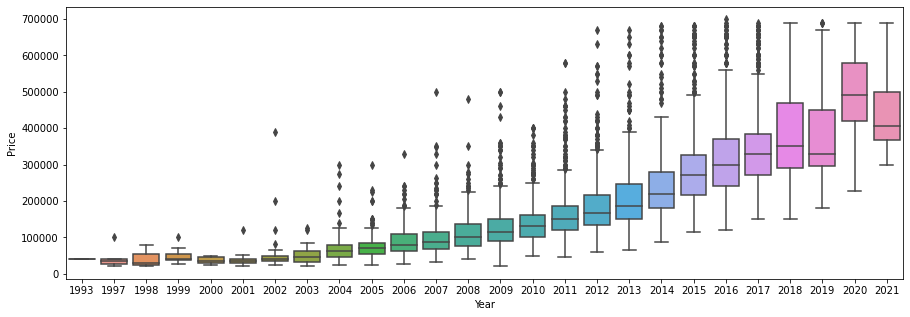

In [182]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Year'], y=df['Price'])

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

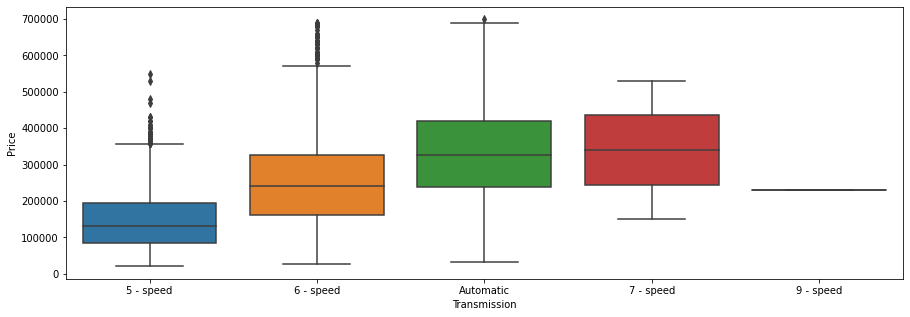

In [183]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Transmission'], y=df['Price'])

## Feature Engineering

In [184]:
df.head()

,Brand,Model,Mileage,Year,Transmission,Engine,Power,Fuel_Type,Price
0,Skoda,Octavia,83260.0,2015,5 - speed,1.6 TDI,77,Diesel,290000.0
1,Skoda,Octavia,180519.0,2009,5 - speed,1.6 TDI,77,Diesel,140000.0
2,Skoda,Octavia,194794.0,2013,5 - speed,1.6 TDI,77,Diesel,190000.0
3,Skoda,Octavia,197229.0,2012,5 - speed,1.6 TDI,77,Diesel,160000.0
4,Skoda,Octavia,128470.0,2014,5 - speed,1.6 TDI,77,Diesel,270000.0


In [189]:
#New Features
df['Mileage_per_Year']=df['Mileage']/df['Year']
df['Age']= 2021 -df['Year']
df['Fuel_Type_and_Year']= df["Year"].astype(str) + df["Fuel_Type"]
df['Fuel_Type_and_Engine']= df["Engine"] + df["Fuel_Type"]
df['Fuel_Type_and_Transmission']= df["Transmission"] + df["Fuel_Type"]

<ipython-input-189-7e540fc4e549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_per_Year']=df['Mileage']/df['Year']
<ipython-input-189-7e540fc4e549>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']= 2021 -df['Year']
<ipython-input-189-7e540fc4e549>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [191]:
df.Brand = LabelEncoder().fit_transform(df.Brand)
df.Model= LabelEncoder().fit_transform(df.Model)
df.Transmission = LabelEncoder().fit_transform(df.Transmission)
df.Engine = LabelEncoder().fit_transform(df.Engine)
df.Fuel_Type= LabelEncoder().fit_transform(df.Fuel_Type)
df.Fuel_Type_and_Year= LabelEncoder().fit_transform(df.Fuel_Type_and_Year)
df.Fuel_Type_and_Engine= LabelEncoder().fit_transform(df.Fuel_Type_and_Engine)
df.Fuel_Type_and_Transmission= LabelEncoder().fit_transform(df.Fuel_Type_and_Transmission)

c:\users\taner\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [193]:
df.head()

,Brand,Model,Mileage,Year,Transmission,Engine,Power,Fuel_Type,Price,Mileage_per_Year,Age,Fuel_Type_and_Year,Fuel_Type_and_Engine,Fuel_Type_and_Transmission
0,36,240,83260.0,2015,0,153,77,1,290000.0,41.320099,6,66,185,1
1,36,240,180519.0,2009,0,153,77,1,140000.0,89.855152,12,35,185,1
2,36,240,194794.0,2013,0,153,77,1,190000.0,96.768008,8,55,185,1
3,36,240,197229.0,2012,0,153,77,1,160000.0,98.026342,9,49,185,1
4,36,240,128470.0,2014,0,153,77,1,270000.0,63.788481,7,60,185,1


## Model Building

In [194]:
x = df.drop('Price', axis=1)
y = df.Price

In [195]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [196]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [197]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [198]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 42576.67345973237


In [199]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     42369.69829334274


In [200]:
lr.coef_

array([ 5.72516335e+02,  5.84216589e+01, -9.11844252e+01, -3.67275856e+03,
        1.56682994e+04,  2.64950874e+02,  1.43261264e+03, -5.39143848e+03,
        1.82261218e+05,  3.67275856e+03,  6.30437133e+03, -4.44047356e+01,
       -1.09403943e+03])

Text(0.5, 1.0, 'Coefficient plot')

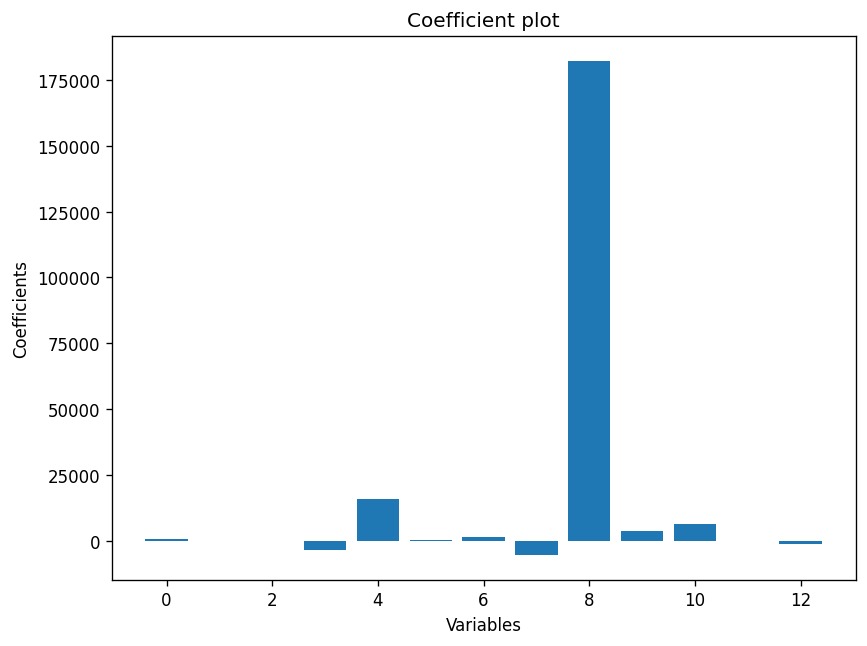

In [201]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [202]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
20,100000.0,166501.185126,-66501.185126
328,254000.0,258438.673160,-4438.673160
5145,180000.0,186246.612466,-6246.612466
1265,90000.0,110323.679915,-20323.679915
5735,30000.0,37986.296489,-7986.296489


<AxesSubplot:ylabel='residuals'>

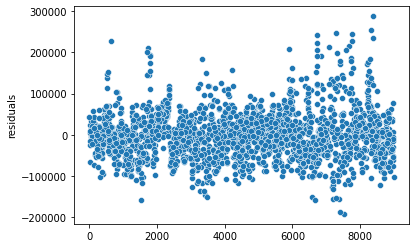

In [203]:
residuals.reset_index(drop=True)
sns.scatterplot(x=residuals.index,y=residuals.residuals)

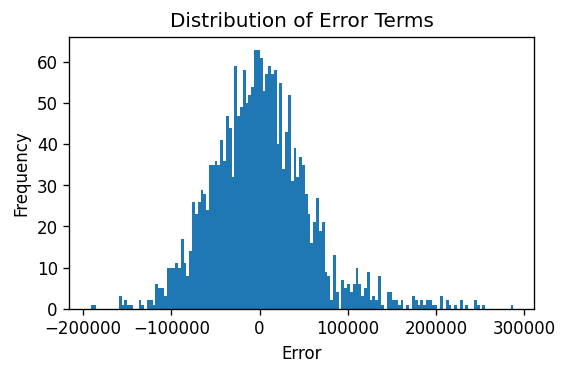

In [204]:
# Histogram for distribution
plt.figure(figsize=(5, 3), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

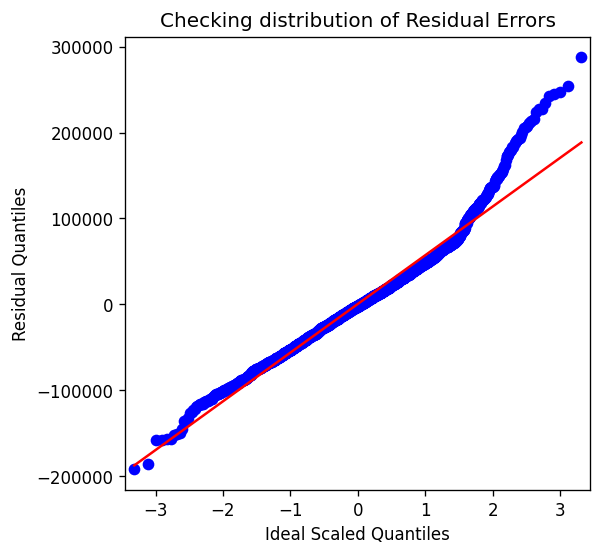

In [205]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()